In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras 

In [2]:
(train_data, train_label), (test_data, test_label) = keras.datasets.mnist.load_data()
print(train_data.shape, train_label.shape)
print(test_data.shape, test_label.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Text(0.5, 1.0, 'cat')

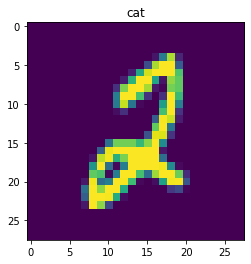

In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_label, random_state=1)
plt.imshow(X_train[0])
plt.title('cat')

<BarContainer object of 10 artists>

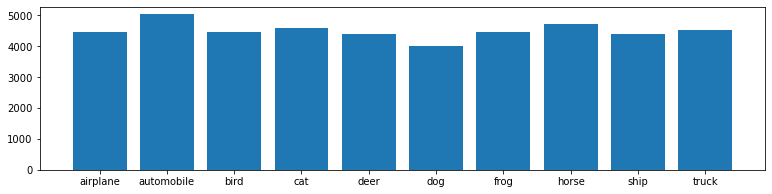

In [4]:
category_num = [Y_train.flatten().tolist().count(i) for i in range (10)]
category_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(13, 3))
plt.bar(category_name, category_num)

## 用卷积神经网络去做

In [5]:
from tensorflow.keras import models, layers, optimizers 
model = models.Sequential()
model.add(
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))
)
model.add(
    layers.Conv2D(64, (3, 3), activation='relu', padding='same')
)
model.add(
    layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')
)

model.add(
    layers.Conv2D(128, (3, 3), activation='relu', padding='same')
)
model.add(
    layers.Conv2D(128, (3, 3), activation='relu', padding='same')
)
model.add(
    layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')
)

model.add(
    layers.Conv2D(256, (3, 3), activation='relu', padding='same')
)
model.add(
    layers.Conv2D(256, (3, 3), activation='relu', padding='same')
)
model.add(
    layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')
)

model.add(
    layers.Conv2D(512, (3, 3), activation='relu', padding='same')
)
model.add(
    layers.Conv2D(512, (3, 3), activation='relu', padding='same')
)
model.add(
    layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')
)
model.add(
    layers.Flatten()
)
model.add(
    layers.Dense(512, activation='relu')
)
model.add(
    layers.Dense(512, activation='relu')
)
model.add(
    layers.Dense(10, activation='softmax')
)
model.compile(
    optimizer=optimizers.SGD(),
    loss = 'categorical_crossentropy',
    metrics=['acc']
)

2021-12-09 21:11:47.196838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 21:11:47.225951: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 21:11:47.226199: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 21:11:47.227115: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

In [7]:
from tensorflow.keras.utils import to_categorical
Y_train_ = to_categorical(Y_train, 10)
X_train_ = np.expand_dims(X_train / 255., axis=-1)
model.fit(
    X_train_, Y_train_, 
    epochs=20,
    batch_size=64
)

Epoch 1/20


2021-12-09 21:11:54.941745: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8300


704/704 [==============================] - 23s 27ms/step - loss: 1.8434 - acc: 0.4206
Epoch 2/20
704/704 [==============================] - 19s 27ms/step - loss: 0.2595 - acc: 0.9162
Epoch 3/20
704/704 [==============================] - 19s 27ms/step - loss: 0.1176 - acc: 0.9612
Epoch 4/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0838 - acc: 0.9734
Epoch 5/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0627 - acc: 0.9799
Epoch 6/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0563 - acc: 0.9834
Epoch 7/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0426 - acc: 0.9865
Epoch 8/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0365 - acc: 0.9877
Epoch 9/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0308 - acc: 0.9903
Epoch 10/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0258 - acc: 0.9919
Epoch 11/20
704/704 [===================